### Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [33]:
birth_Death_Rate_Data = pd.read_csv('crude-birth-death-natural-increase-rates-by-ethnic-group-from-1971-onwards.csv')
graduate_Salary_Data = pd.read_csv('graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv', encoding = 'latin-1')
birth_Death_Rate_Data.head()


,year,ethnic_group,crude_death_rate,crude_birth_rate,crude_natural_inc_rate
0,1971,Chinese,5.5,22.1,16.6
1,1971,Malays,4.6,22.9,18.3
2,1971,Indians,5.9,21.1,15.2
3,1971,Others,5.6,29.2,23.6
4,1972,Chinese,5.4,23.0,17.6


### Singapore Birth Rate over the years


<AxesSubplot: xlabel='year', ylabel='crude_birth_rate'>

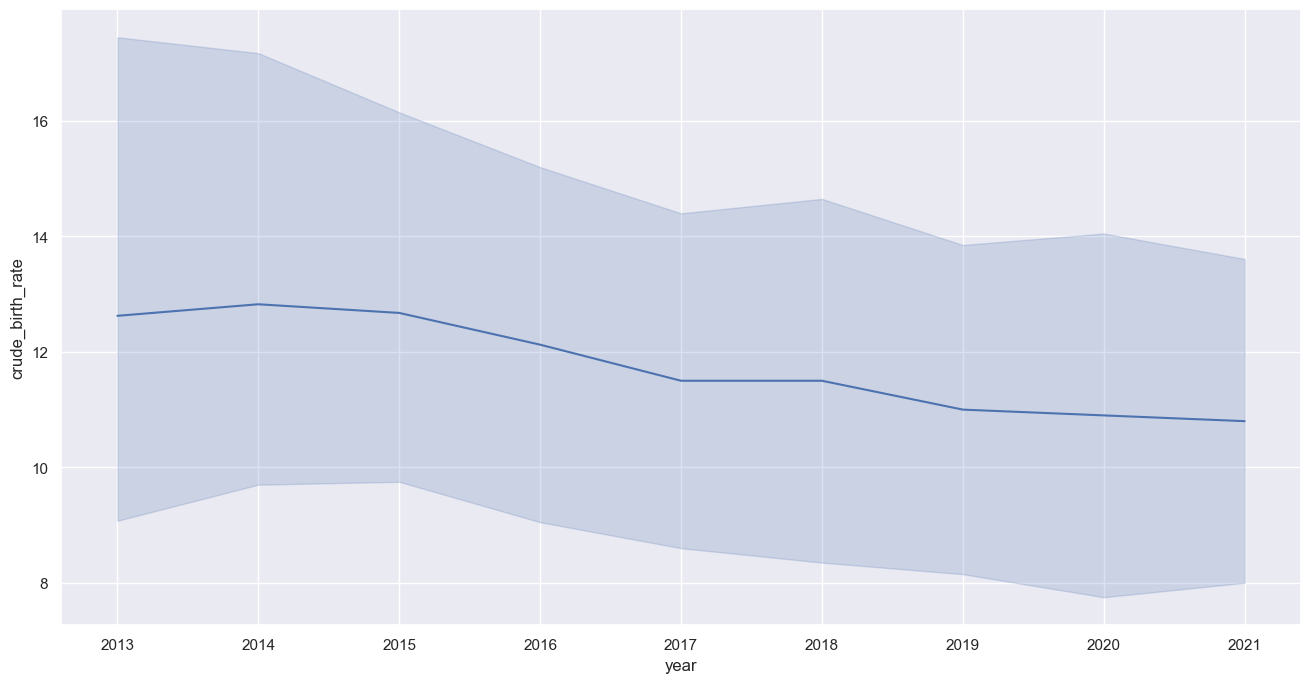

In [73]:
birth_Rate = pd.DataFrame(birth_Death_Rate_Data[['crude_birth_rate','year']])
birth_Rate_Above2012 = birth_Rate[birth_Rate['year'] >= 2013]
birth_Rate_Above2012.head()

f = plt.figure(figsize=(16, 8))
sb.lineplot(data = birth_Rate_Above2012, x = 'year', y = 'crude_birth_rate')

### Fresh Graduate Income Salary Over the Years

In [171]:
salary_Rate = pd.DataFrame(graduate_Salary_Data[['year','basic_monthly_mean']])
salary_Rate = salary_Rate[salary_Rate["basic_monthly_mean"].str.contains("na")==False]
'''for x in salary_Rate["basic_monthly_mean"]:
    if x == 'na':
        print('brah')
    else:
        print('sure')'''
salary_Rate_2013 = salary_Rate[salary_Rate['year'] == 2013]
mean = salary_Rate_2013['basic_monthly_mean'].mean()
print(mean)
#salary_Rate_mean = salary_Rate.query('year == 2013')['basic_monthly_mean'].mean()
#print(salary_Rate)



#f = plt.figure(figsize=(16, 8))
#sb.lineplot(data = salary_Rate, x = 'year', y = 'basic_monthly_mean')

4.806863676017607e+305
